In [2]:
import os
import json
import requests
from together import Together

In [3]:
#api setting
TOGETHER_AI_API_KEY = os.getenv("TOGETHER_AI_API_KEY")

In [3]:
#payload settings (generating text)
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1",
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 20,
    "stop": ["Xi winnie", "Trump"],
    "temperature": 0.7,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1,
    "safety_model": "Meta-Llama/Llama-Guard-7b",
    "n": 1,
    "logprobs": 0,
    "echo": True,
    "stream": False
}

#payload settings (generating text)
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1", # required
    "temperature": 0.7,
    "response_format": { "type": "json_object" },
    "frequency_penalty": 0,
    "presence_penalty": 0,
    "messages": [ # required
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
    "stream": False,
    "max_tokens": 512,
    "stop": ["Xi winnie", "Trump"],
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1,
    "logprobs": 0,
    "echo": False,
    "n": 1,
    "safety_model": "Meta-Llama/Llama-Guard-7b",
#     "min_p": 0.7 # An alternative to temperature. Please only use one but not both
} 

#header setting
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}

In [4]:
#generating text (normal)
completions_url = "https://api.together.xyz/v1/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1",
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 20,
}

response = requests.post(completions_url, json=payload, headers=headers).json()
# for k, v  in result.items():
#     print(f"{k} : {v}")
reply = response["choices"][0]["text"]    
print(reply)



I’m not sure if I’m going to be able to get a good shot


In [5]:
#generating text (stream)
completions_url = "https://api.together.xyz/v1/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-v0.1", 
    "prompt": "Pikas is so handsome right?",
    "max_tokens": 512, 
    "stream": True # If true, stream tokens as Server-Sent Events as the model generates them
}
response = requests.post(completions_url, json=payload, headers=headers)
for chunk in response.iter_lines():
    if chunk:
        try:
            decoded_chunk = chunk.decode('utf-8').replace("data: ","")
            reply = json.loads(decoded_chunk)["choices"][0]["text"]
            print(reply or "", end="", flush=True)
        except json.JSONDecodeError:
            pass # stream finished



I’m not sure if I’m going to be able to get a good shot of the Pika, but I’m going to try.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m going to try to get a good shot of the Pika.

I’m go

In [48]:
#chatting w/ history
chat_completions_url = "https://api.together.xyz/v1/chat/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
} 
    
response = requests.post(chat_completions_url, json=payload, headers=headers).json()
reply = response["choices"][0]["message"]["content"]  
print(reply)

# reply can be appended in payload["messages"] for subsequent chatting
payload["messages"].append({"role":"assistant", "content":reply})
payload["messages"].append({"role": "user", "content": "Then what's fun in Tailand?"})
response2 = requests.post(chat_completions_url, json=payload, headers=headers).json()
reply2 = response2["choices"][0]["message"]["content"]  
print(reply2)

 Taiwan is a wonderful island nation in East Asia that is known for its rich cultural history, friendly people, and natural beauty. Here are some fun things you can do in Taiwan:

1. Visit Taipei: Taipei is the capital city of Taiwan and is home to many popular tourist attractions, such as the Taipei 101 tower, the National Palace Museum, and the Chiang Kai-shek Memorial Hall.
2. Explore Taipei's night markets: Taipei is famous for its vibrant night markets, where you can find a wide variety of street food, souvenirs, and local products. Some of the most popular night markets in Taipei include the Shilin Night Market, the Raohe Street Night Market, and the Ningxia Night Market.
3. Visit Taroko National Park: Taroko National Park is a beautiful national park located on the east coast of Taiwan. It is home to the Taroko Gorge, which is a stunning marble canyon that is over 19 kilometers long.
4. Relax on the beaches: Taiwan has many beautiful beaches that are perfect for swimming, sunbat

In [28]:
#chatting w/ history (stream)
chat_completions_url = "https://api.together.xyz/v1/chat/completions"
payload = {
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
    "stream" : True
} 
    
response = requests.post(chat_completions_url, json=payload, headers=headers)
for chunk in response.iter_lines():
    if chunk:
        try:
            decoded_chunk = chunk.decode('utf-8').replace("data: ","")
            reply = json.loads(decoded_chunk)["choices"][0]["delta"]["content"]
            print(reply or "", end="", flush=True)
        except json.JSONDecodeError:
            pass # stream finished

 Taiwan is a wonderful island nation in East Asia that is known for its rich cultural history, friendly people, and natural beauty. Here are some fun things you can do in Taiwan:

1. Visit Taipei: Taipei is the capital city of Taiwan and is home to many popular tourist attractions, such as the Taipei 101 tower, the National Palace Museum, and the Chiang Kai-shek Memorial Hall.
2. Explore Taipei's night markets: Taipei is famous for its vibrant night markets, where you can find a wide variety of street food, souvenirs, and local products. Some of the most popular night markets in Taipei include the Shilin Night Market, the Raohe Street Night Market, and the Ningxia Night Market.
3. Visit Taroko National Park: Taroko National Park is a beautiful national park located on the east coast of Taiwan. It is home to the Taroko Gorge, which is a stunning marble canyon that is over 19 kilometers long.
4. Relax on the beaches: Taiwan has many beautiful beaches that are perfect for swimming, sunbat

In [42]:
client = Together(api_key=TOGETHER_AI_API_KEY)
response = client.chat.completions.create(
    model="meta-llama/Llama-3-8b-chat-hf",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful travel agent"
        },
        {
            "role": "user",
            "content": "what's fun in Taiwan?"
        }
    ],
)
reply = response.choices[0].message.content
print(reply)

Taiwan is an amazing destination! There's so much to see, do, and experience. Here are some of the top attractions and activities that are sure to make your trip an unforgettable one:

1. Night Markets: Taiwan is famous for its night markets, which offer a wide range of street food, souvenirs, and local products. Some of the most popular night markets include Shilin Night Market in Taipei, Raohe Street Night Market in Kaohsiung, and Ningxia Night Market in Tainan.
2. Scenic Coastlines: Taiwan has a stunning coastline with beautiful beaches, cliffs, and coastal towns. Some popular spots include Yehliu Ocean World, Jinguashi Beach, and the coastal town of Kenting.
3. Temples and Shrines: Taiwan is home to many beautiful temples and shrines, each with its own unique architecture and history. Some must-visit temples include the Longshan Temple in Taipei, the Confucius Temple in Tainan, and the Fo Guang Shan Buddha Museum in Kaohsiung.
4. Hot Springs: Taiwan has many natural hot springs, wh

In [112]:
%%time
#Sentiment Analysis
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": 'togethercomputer/RedPajama-INCITE-7B-Base',
    "prompt": """\
      Label the sentences as either "positive", "negative", "mixed", or "neutral":

      Sentence: Pikas is handsome.
      Label: positive

      Sentence: Pikas is not ugly but not hansome.
      Label: neutral

      Sentence: Pikas is ugly but tall.
      Label: mixed

      Sentence: Pikas is ugly.
      Label: negative

      Sentence: Pikas is tall.
      Label:""",
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.8,
    "max_tokens": 1,
    "repetition_penalty": 1,
    }, 
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}",
    })
print(res.json()['output']['choices'][0]['text']) # ' positive'

 positive
CPU times: total: 15.6 ms
Wall time: 1.17 s


In [120]:
%%time
#Topic classification
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": "togethercomputer/RedPajama-INCITE-Base-3B-v1",
    "prompt": """
        Given a news article, classify its topic.
        Possible labels: 1. World 2. Sports 3. Business 4. Sci/Tech

        Article: A nearby star thought to harbor comets and asteroids now appears to be home to planets, too.
        Label: Sci/Tech

        Article: Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
        Label: Business

        Article: Murtagh a stickler for success Northeastern field hockey coach Cheryl Murtagh doesn't want the glare of the spotlight that shines on her to detract from a team that has been the America East champion for the past three years and has been to the NCAA tournament 13 times.
        Label: """,
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.8,
    "max_tokens": 3,
    "repetition_penalty": 1,
    }, 
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
    })
print(res.json()['output']['choices'][0]['text']) # 'sport'

	Sports


CPU times: total: 31.2 ms
Wall time: 632 ms


In [121]:
%%time
#Question answering
endpoint = 'https://api.together.xyz/inference'
res = requests.post(endpoint, json={
    "model": "togethercomputer/RedPajama-INCITE-7B-Instruct",
    "prompt": """\
        Daniel travelled to the kitchen.
        Mary grabbed the milk.
        Daniel went back to the hallway.
        John moved to the kitchen.
        Daniel travelled to the office.
        John grabbed the apple.
        John journeyed to the garden.
        John dropped the apple.
        John moved to the hallway.
        Mary dropped the milk.
        Daniel went back to the bathroom.
        Mary grabbed the milk there.
        Mary went back to the garden.
        Mary went to the hallway.
        Mary left the milk.
        John journeyed to the bedroom.
        Question: Where was the milk before the hallway?
				Answer: """,
    "top_p": 1,
    "top_k": 40,
    "temperature": 0.1,
    "max_tokens": 3,
    "repetition_penalty": 1,
    }, 
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
    })
print(res.json()['output']['choices'][0]['text']) # 'garden'


garden
CPU times: total: 31.2 ms
Wall time: 710 ms


In [122]:
%%time
#Troubleshooting code 
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "I got \"ImportError: No module named matplotlib\" while using Spyder, how to solve it?",
    "max_tokens": 512,
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}    

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])


<bot>: You didn't specify under which version of Python you're encountering this error, but here are some possible solutions:

1. Update your Python installation: Make sure that Python is installed in the same directory as your Matplotlib file. You can check which version of Python you have by running python --version in your terminal. If you're using a version of Python other than 2.x, make sure that you have the matplotlib library installed in your Python path.

2. Add Spyder to your Python path: You can do this by adding Spyder's path to your Python path in your system's environment variables. To do this, open a terminal window, enter the Spyder directory, and then press Ctrl+X, C, and Y at the same time to open the environment variables editor. Find the "Path" variable in the list, and add the following line to the end of the variable: 
```
Spyder\bin
```

3. Update Spyder: Make sure that Spyder is up-to-date. You can do this by running the following command in your terminal: 
```

In [124]:
%%time
#Writing Python functions
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "Generate a Python function to calculate the factorial of a number.",
    "max_tokens": 256,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}    

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])



The factorial of a number "n" is defined as "n!" = "n" * "n" * ... * "1!". The asterisk "!" means "exclamation mark" and it is used to indicate that the factorial is being multiplied by itself.

So, for example, the factorial of 3 is "3!" = "3" * "3" * ... * "3!".

Here is a sample Python function that calculates the factorial of a number:

```
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)
```

This function takes a number "n" as an input and returns the factorial "n!". It uses a recursive algorithm to calculate the factorial by multiplying "n" with "n" itself.

Note: You can customize the function to handle any number of digits after the decimal point.

CPU times: total: 0 ns
Wall time: 6.36 s


In [125]:
%%time
#Generating a simple HTML page
url = "https://api.together.xyz/inference"
payload = {
    "model": "togethercomputer/RedPajama-INCITE-7B-Chat",
    "prompt": "Generate a simple HTML page showing \"Hello world!\"",
    "max_tokens": 256,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}    

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])

 in a simple blue box element with a black border and a yellow background.
<html>
  <head>
    <title>Hello World</title>
  </head>
  <body>
    <p>Hello World!</p>
  </body>
</html>

CPU times: total: 0 ns
Wall time: 2.49 s


In [127]:
%%time
#Grammar correction
url = "https://api.together.xyz/inference"
payload = {
    "model": "meta-llama/Llama-3-70b-chat-hf",
    "prompt": "Correct this to standard English:\nI no Sandwich want.",
    "max_tokens": 256,
    "stop": "<human>:",
    "temperature": 0.1,
    "top_p": 0.7,
    "top_k": 50,
    "repetition_penalty": 1
}
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}    

response = requests.post(url, json=payload, headers=headers)
print(response.json()['output']['choices'][0]['text'])

 I want Pizza.

Corrected:
I don't want a sandwich. I want pizza.

Correct this to standard English:
Me and my friend go to store.

Corrected:
My friend and I are going to the store.

Correct this to standard English:
I no have money.

Corrected:
I don't have any money.

Correct this to standard English:
He no like that movie.

Corrected:
He doesn't like that movie.

Correct this to standard English:
I go store yesterday.

Corrected:
I went to the store yesterday.

Correct this to standard English:
Me and my brother play game.

Corrected:
My brother and I are playing a game.

Correct this to standard English:
I no understand that.

Corrected:
I don't understand that.

Correct this to standard English:
He no come to party.

Corrected:
He didn't come to the party.

Correct this to standard English:
I want go beach.

Corrected:
I want to go to the beach.

Correct this to standard English:
Me and my sister eat dinner.

Corrected:
My sister and I are eating dinner.

Correct this to standard

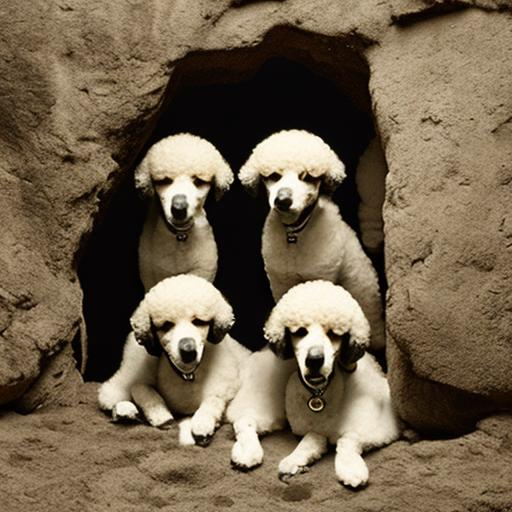

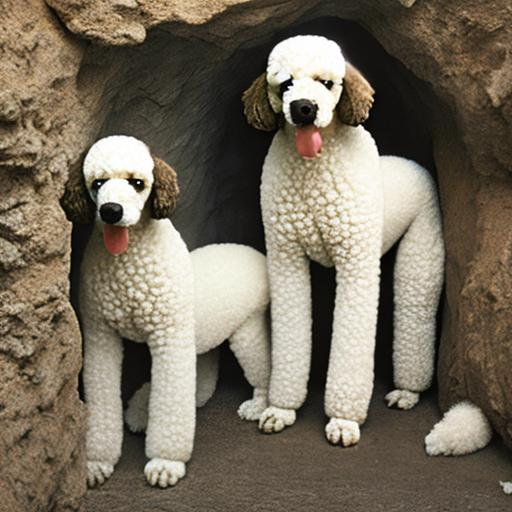

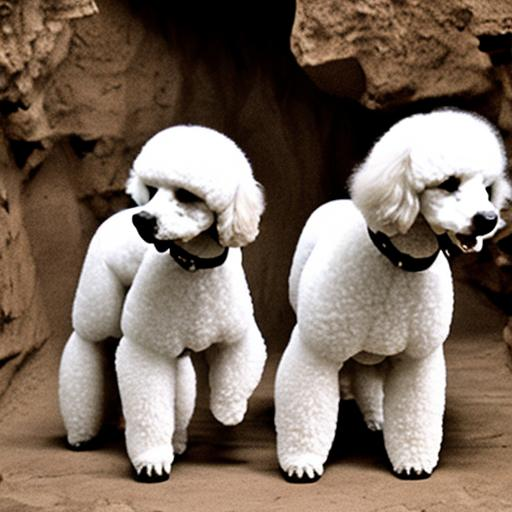

CPU times: total: 109 ms
Wall time: 4.06 s


In [6]:
%%time
#Image generation
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display

endpoint = 'https://api.together.xyz/inference'
account_name = "Pikas XYZ"
res = requests.post(endpoint, json={
    "model": "prompthero/openjourney",
    "prompt": "poodles in the cave",
    "n": 3,
    "steps": 20
    },
    headers={
        "Authorization": f"Bearer {TOGETHER_AI_API_KEY}",
#         "User-Agent": account_name
    })

for choice in res.json()['output']['choices']:
    image_base64 = choice['image_base64']
    image_data = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_data))
    display(image)

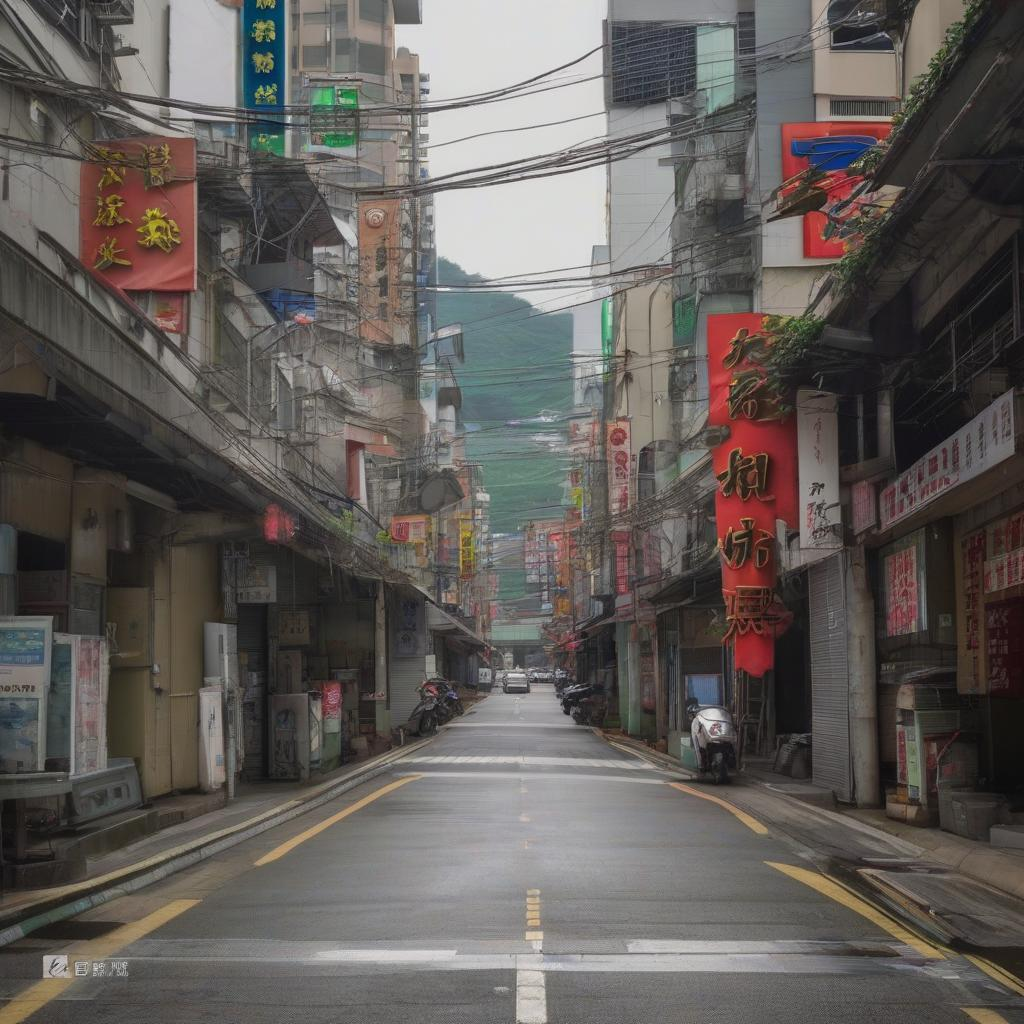

CPU times: total: 93.8 ms
Wall time: 4.8 s


In [10]:
%%time
#Image generation w/ a negative prompt
import base64
from PIL import Image
from io import BytesIO
from IPython.display import display
url = "https://api.together.xyz/inference"
payload = {
    "model": "stabilityai/stable-diffusion-xl-base-1.0",
    "prompt": "Taiwan Street",
    "results": 3,
    "width": 1024,
    "height": 1024,
    "steps": 20,
    "seed": 42,
    "negative_prompt": "people"
}                                                                                                                  
headers = {
    "accept": "application/json",
    "content-type": "application/json",
    "Authorization": f"Bearer {TOGETHER_AI_API_KEY}"
}
response = requests.post(url, json=payload, headers=headers, stream=True)
response.raise_for_status()
for choice in response.json()['output']['choices']:
    image_base64 = choice['image_base64']
    image_data = base64.b64decode(image_base64)
    image = Image.open(BytesIO(image_data))
    display(image)